# **Task 1**  
## **Author:** Aravind S  
## **Task Description:**  
The Wine Quality dataset is used here to create a **Supervised Learning model**. This dataset contains numeric attributes such as acidity level, amount of various chemical components, pH, density, etc. In this file, it is shown how to load,handle and make useful visualisations out of the given data. 

## Importing the required modules  

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Reading Wine Quality Data set

In [26]:
data = pd.read_csv('WineQT.csv')

In [27]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Randomising the dataset

In [28]:
data = data.sample(frac=1).reset_index(drop=True) 
data = data.drop(columns='Id')

# Data Description

In [29]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.9,0.61,0.49,2.00,0.270,23.0,110.0,0.99720,3.12,1.02,9.3,5
1,6.7,0.70,0.08,3.75,0.067,8.0,16.0,0.99334,3.43,0.52,12.6,5
2,9.1,0.66,0.15,3.20,0.097,9.0,59.0,0.99976,3.28,0.54,9.6,5
3,9.1,0.28,0.48,1.80,0.067,26.0,46.0,0.99670,3.32,1.04,10.6,6
4,7.2,0.62,0.06,2.70,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,5


In [30]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1138,10.5,0.510,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.8,7
1139,7.0,0.690,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,6
1140,7.6,0.715,0.00,2.1,0.068,30.0,35.0,0.99533,3.48,0.65,11.4,6
1141,6.9,0.410,0.31,2.0,0.079,21.0,51.0,0.99668,3.47,0.55,9.5,6
1142,8.7,0.330,0.38,3.3,0.063,10.0,19.0,0.99468,3.30,0.73,12.0,7


In [32]:
data.nunique() #unique values

fixed acidity            91
volatile acidity        135
citric acid              77
residual sugar           80
chlorides               131
free sulfur dioxide      53
total sulfur dioxide    138
density                 388
pH                       87
sulphates                89
alcohol                  61
quality                   6
dtype: int64

In [33]:
data.shape #shape of data

(1143, 12)

In [35]:
data.isnull().sum() #no missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [36]:
print(data.groupby('quality').size())

quality
3      6
4     33
5    483
6    462
7    143
8     16
dtype: int64


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [38]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Exploratory Data Analysis

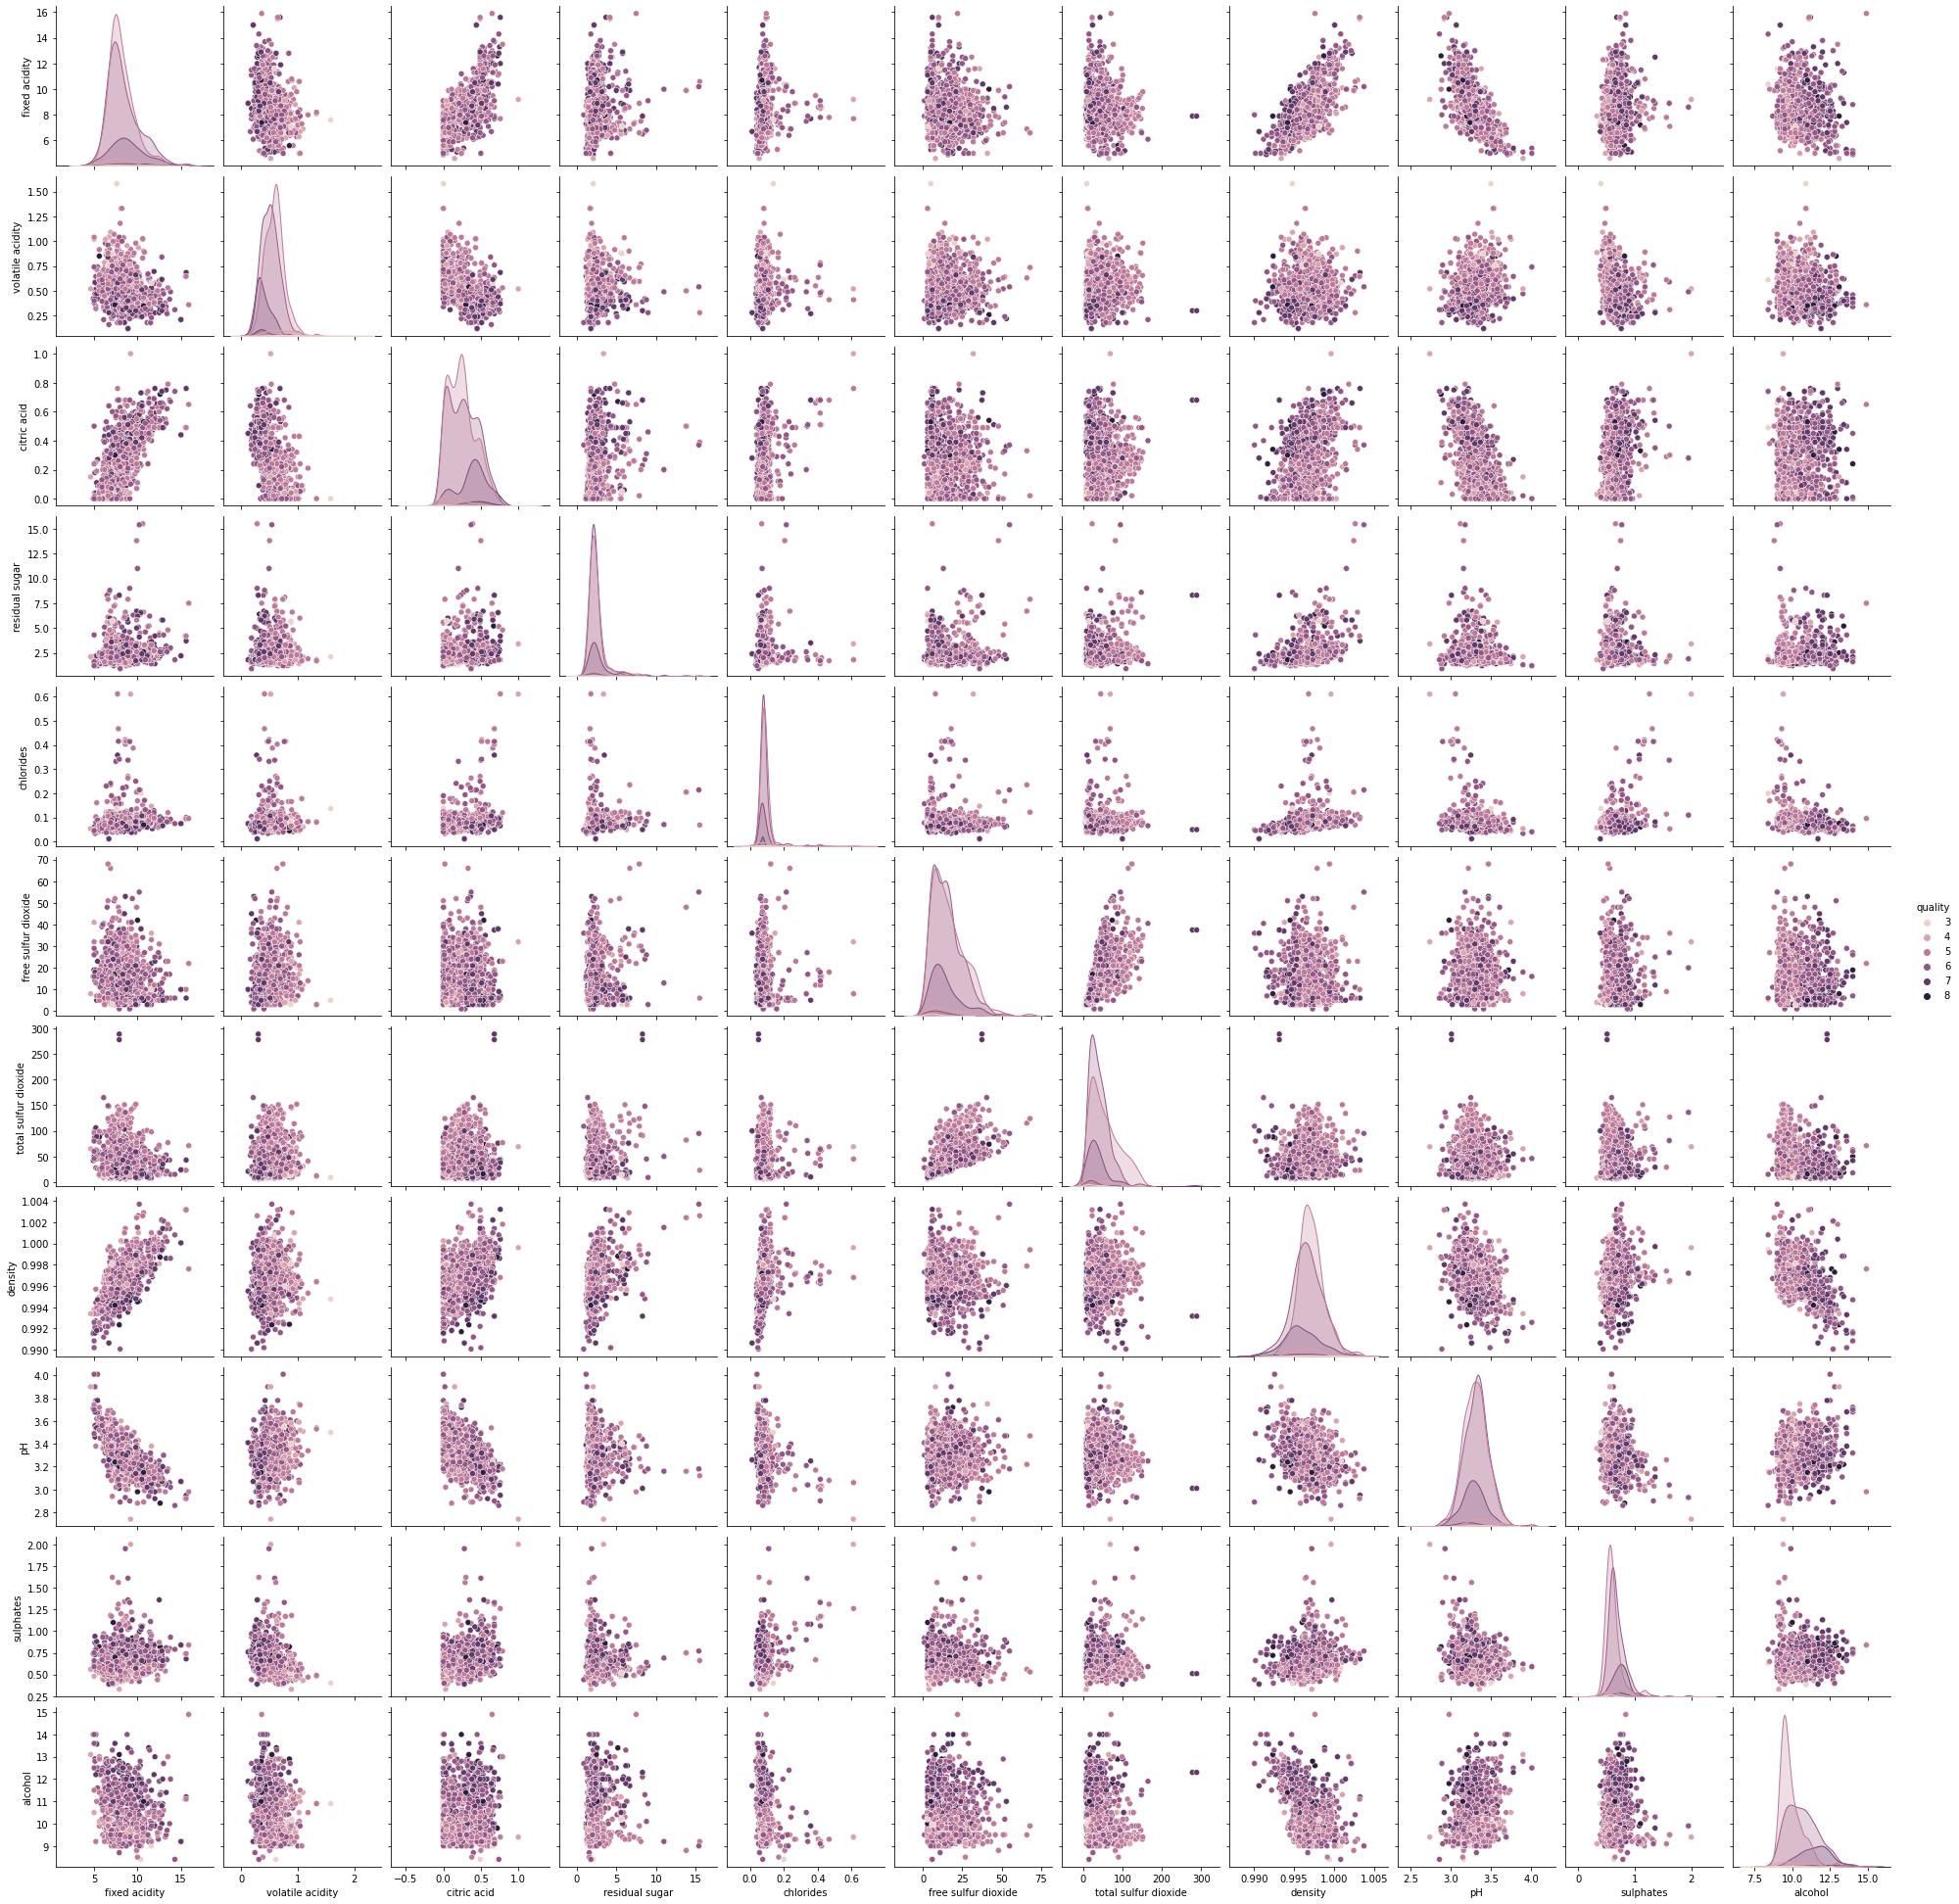

In [40]:
sns.pairplot(data, hue='quality')

# Correlation Matrix

<AxesSubplot:>

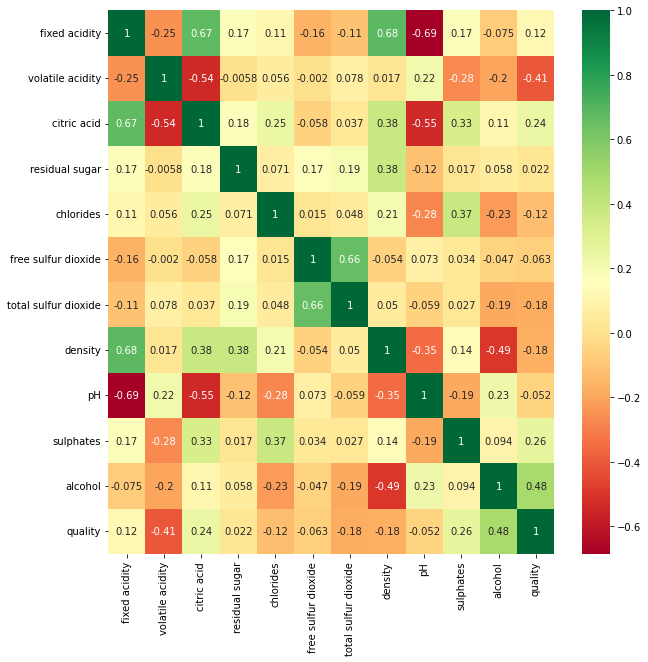

In [41]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True, cmap="RdYlGn")


# Histogram Features  

Sepal Length and Width

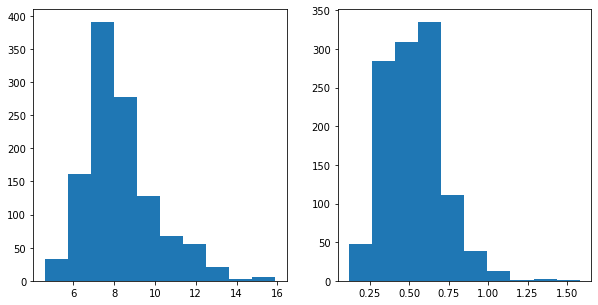

In [45]:
fig1 = plt.figure(figsize=(10,5))
f1 = fig1.add_subplot(121)
f2 = fig1.add_subplot(122)
f1.hist(data['fixed acidity'])
f2.hist(data['volatile acidity'])
plt.show()

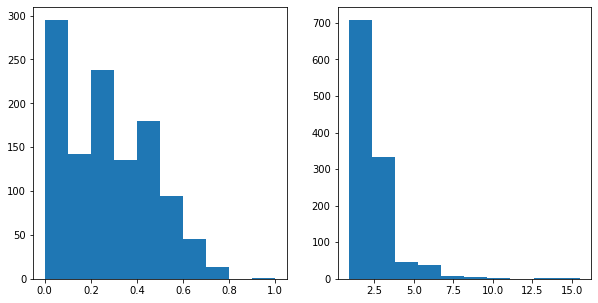

In [46]:
fig2 = plt.figure(figsize=(10,5))
f1 = fig2.add_subplot(121)
f2 = fig2.add_subplot(122)
f1.hist(data['citric acid'])
f2.hist(data['residual sugar'])
plt.show()

# Box plot of feature

<AxesSubplot:ylabel='quality'>

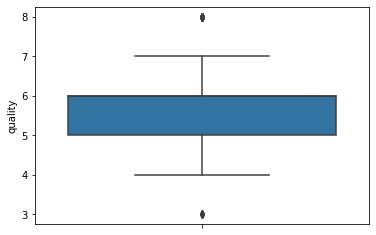

In [48]:
sns.boxplot(y='quality',data=data)

<AxesSubplot:ylabel='pH'>

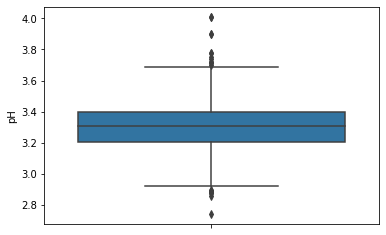

In [49]:
sns.boxplot(y='pH',data=data)

<AxesSubplot:ylabel='sulphates'>

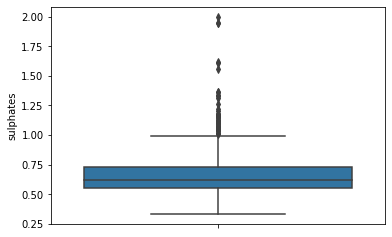

In [50]:
sns.boxplot(y='sulphates',data=data)

<AxesSubplot:ylabel='density'>

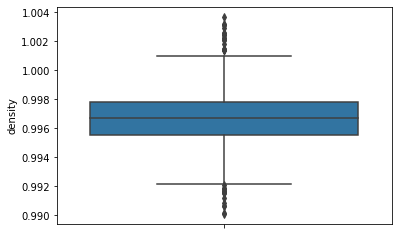

In [51]:
sns.boxplot(y='density',data=data)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

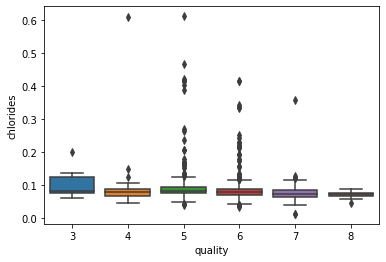

In [52]:
sns.boxplot(x='quality',y='chlorides',data=data)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

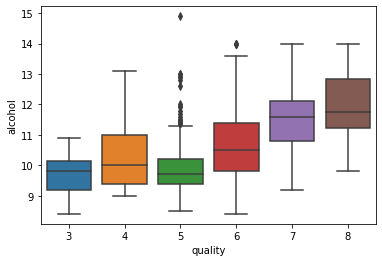

In [53]:
sns.boxplot(x='quality',y='alcohol',data=data)

# Data Splitting

In [84]:
X = data.iloc[:,0:11]
Y = data['quality']

In [85]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.9,0.61,0.49,2.00,0.270,23.0,110.0,0.99720,3.12,1.02,9.3
1,6.7,0.70,0.08,3.75,0.067,8.0,16.0,0.99334,3.43,0.52,12.6
2,9.1,0.66,0.15,3.20,0.097,9.0,59.0,0.99976,3.28,0.54,9.6
3,9.1,0.28,0.48,1.80,0.067,26.0,46.0,0.99670,3.32,1.04,10.6
4,7.2,0.62,0.06,2.70,0.077,15.0,85.0,0.99746,3.51,0.54,9.5


In [86]:
X.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1138,10.5,0.510,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.8
1139,7.0,0.690,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
1140,7.6,0.715,0.00,2.1,0.068,30.0,35.0,0.99533,3.48,0.65,11.4
1141,6.9,0.410,0.31,2.0,0.079,21.0,51.0,0.99668,3.47,0.55,9.5
1142,8.7,0.330,0.38,3.3,0.063,10.0,19.0,0.99468,3.30,0.73,12.0


In [87]:
Y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [88]:
Y.tail()

1138    7
1139    6
1140    6
1141    6
1142    7
Name: quality, dtype: int64

# Feature Importance

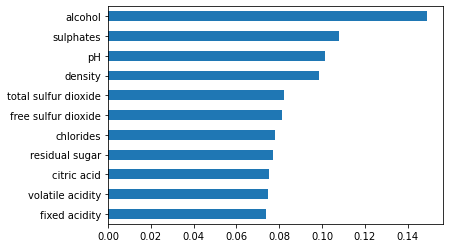

In [89]:
from sklearn.ensemble import ExtraTreesClassifier
fmodel = ExtraTreesClassifier()
fmodel.fit(X,Y)
feat_importance = pd.Series(sorted(fmodel.feature_importances_), index = X.columns)
feat_importance.plot(kind = 'barh')
plt.show()

# Label encoder

In [91]:
le = LabelEncoder()
Y = le.fit_transform(Y)

# Training Model

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8 , random_state=1)

In [93]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

# Performance Evaluation

In [95]:
from sklearn.metrics import accuracy_score
pred = rf.predict(X_test)
print("Accracy:",round(accuracy_score(Y_test, pred),5)*100,"%")

Accracy: 68.559 %


# Confusion Matrix

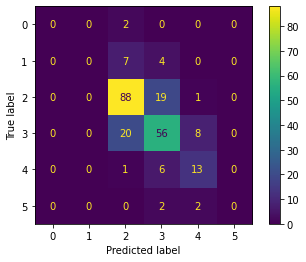

In [97]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, Y_test)
plt.show()